In [1]:
import requests

def send_line_notification(message):
    line_token = "9jBlZvpTEg7fQSKaevfKIGU1EQCAxl0SujL7i1pywuQ"
    endpoint = 'https://notify-api.line.me/api/notify'
    message = "\n{}".format(message)
    payload = {'message': message}
    headers = {'Authorization': 'Bearer {}'.format(line_token)}
    requests.post(endpoint, data=payload, headers=headers)

In [16]:
%matplotlib inline
import pandas_profiling as pdp
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv

import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
#matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
#plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない



In [17]:
df_train = pd.read_csv(os.path.join(os.getcwd(),'train_set.csv'), delim_whitespace=False)
df_test = pd.read_csv(os.path.join(os.getcwd(),'test_set.csv'), delim_whitespace=False)

df_all = pd.concat([df_train,df_test])

quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('PRICE')
quantitative.remove('Id')

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df_train.head()

Id  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM     AYB  \
0   0       3          1  Hot Water Rad  Y        2.0      9      5  1910.0   
1   1       3          2  Hot Water Rad  Y        1.0     10      5  1913.0   
2   2       3          1      Warm Cool  Y        2.0      5      3  1917.0   
3   3       3          1      Warm Cool  Y        1.0      8      3  1908.0   
4   4       3          1  Hot Water Rad  Y        2.0      9      3  1908.0   

   YR_RMDL    ...      ASSESSMENT_NBHD  ASSESSMENT_SUBNBHD CENSUS_TRACT  \
0   2009.0    ...           Old City 2    040 D Old City 2       4201.0   
1      NaN    ...           Old City 2    040 D Old City 2       4201.0   
2   2000.0    ...           Old City 2    040 D Old City 2       4201.0   
3   2006.0    ...           Old City 2    040 D Old City 2       4201.0   
4   2013.0    ...           Old City 2    040 D Old City 2       4201.0   

  CENSUS_BLOCK    WARD  SQUARE          X          Y QUADRANT      PRICE  
0  004201 2006  Ward 2     152 -77.040429  38.914881       NW  2100000.0  
1  004201 2006  Ward 2     152 -77.040429  38.914881       NW  1950000.0  
2  004201 2005  Ward 2     152 -77.040429  38.914881       NW  1325000.0  
3  004201 2005  Ward 2     152 -77.040429  38.914881       NW  1240000.0  
4  004201 2005  Ward 2     152 -77.040429  38.914881       NW   592250.0  

[5 rows x 49 columns]

In [14]:
df_train.shape

(49108, 49)

In [103]:
pd.set_option('display.max_columns', 100)

In [104]:
df_train["LANDAREA"].isnull().sum()

0

In [105]:
df_train.columns

Index(['Id', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'PRICE'],
      dtype='object')

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


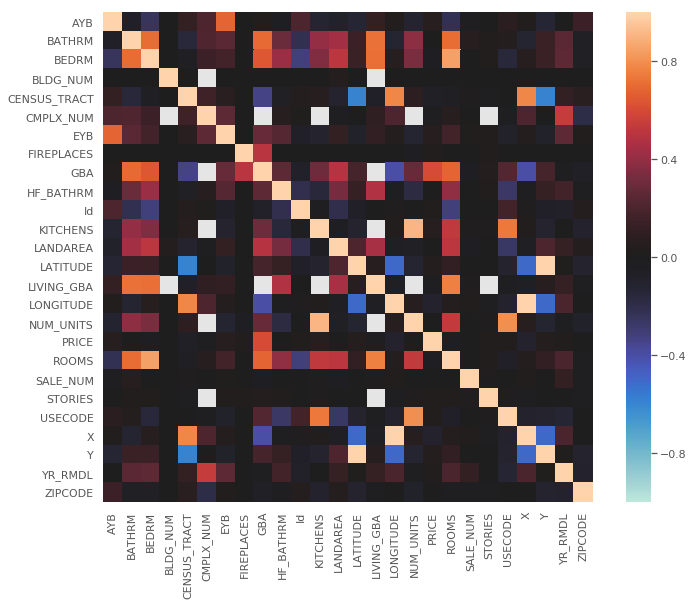

In [106]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_all.corr(), square=True, vmax=1, vmin=-1, center=0)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


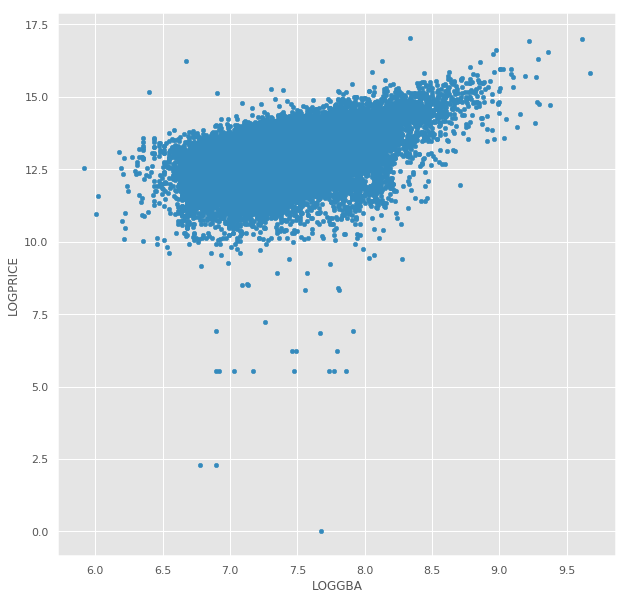

In [107]:

data = pd.DataFrame()

var = 'LOGGBA'
data["LOGGBA"] = np.log(df_train['GBA'])
data["LOGPRICE"] = np.log(df_train['PRICE'])
data["PRICE"] = df_train["PRICE"]


data.head()
data.plot.scatter(x=var,y="LOGPRICE")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


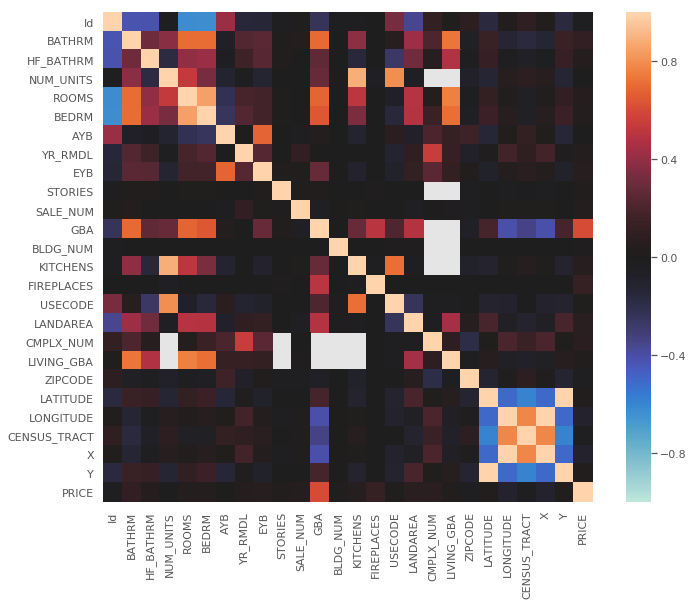

In [108]:

fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train[(df_train['PRICE'] < 53973000)].corr(), square=True, vmax=1, vmin=-1, center=0)


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Id    BATHRM  HF_BATHRM  NUM_UNITS     ROOMS     BEDRM  \
Id            1.000000 -0.009721   0.137726        NaN  0.097982  0.077898   
BATHRM       -0.009721  1.000000  -0.113208        NaN  0.563967  0.380809   
HF_BATHRM     0.137726 -0.113208   1.000000        NaN  0.093995  0.200104   
NUM_UNITS          NaN       NaN        NaN        NaN       NaN       NaN   
ROOMS         0.097982  0.563967   0.093995        NaN  1.000000  0.854450   
BEDRM         0.077898  0.380809   0.200104        NaN  0.854450  1.000000   
AYB           0.072569  0.478871  -0.236405        NaN  0.392567  0.359810   
YR_RMDL            NaN       NaN        NaN        NaN       NaN       NaN   
EYB           0.072569  0.478871  -0.236405        NaN  0.392567  0.359810   
STORIES            NaN       NaN        NaN        NaN       NaN       NaN   
SALE_NUM           NaN       NaN        NaN        NaN       NaN       NaN   
GBA                NaN       NaN        NaN        NaN       NaN       NaN   
BLDG_NUM           NaN       NaN        NaN        NaN       NaN       NaN   
KITCHENS           NaN       NaN        NaN        NaN       NaN       NaN   
FIREPLACES    0.105099 -0.196452   0.254297        NaN  0.000000  0.138189   
USECODE       0.072569  0.478871  -0.236405        NaN  0.392567  0.359810   
LANDAREA      0.009409 -0.367948   0.372235        NaN -0.051774  0.035267   
CMPLX_NUM     0.072569  0.478871  -0.236405        NaN  0.392567  0.359810   
LIVING_GBA    0.129385  0.443539   0.228773        NaN  0.770785  0.804540   
ZIPCODE            NaN       NaN        NaN        NaN       NaN       NaN   
LATITUDE     -0.063356 -0.379060   0.129225        NaN -0.371951 -0.393434   
LONGITUDE     0.063356  0.379060  -0.129225        NaN  0.371951  0.393434   
CENSUS_TRACT       NaN       NaN        NaN        NaN       NaN       NaN   
X             0.063356  0.379060  -0.129225        NaN  0.371951  0.393434   
Y            -0.063356 -0.379060   0.129225        NaN -0.371951 -0.393434   
PRICE              NaN       NaN        NaN        NaN       NaN       NaN   

                   AYB  YR_RMDL       EYB  STORIES  SALE_NUM  GBA  BLDG_NUM  \
Id            0.072569      NaN  0.072569      NaN       NaN  NaN       NaN   
BATHRM        0.478871      NaN  0.478871      NaN       NaN  NaN       NaN   
HF_BATHRM    -0.236405      NaN -0.236405      NaN       NaN  NaN       NaN   
NUM_UNITS          NaN      NaN       NaN      NaN       NaN  NaN       NaN   
ROOMS         0.392567      NaN  0.392567      NaN       NaN  NaN       NaN   
BEDRM         0.359810      NaN  0.359810      NaN       NaN  NaN       NaN   
AYB           1.000000      NaN  1.000000      NaN       NaN  NaN       NaN   
YR_RMDL            NaN      NaN       NaN      NaN       NaN  NaN       NaN   
EYB           1.000000      NaN  1.000000      NaN       NaN  NaN       NaN   
STORIES            NaN      NaN       NaN      NaN       NaN  NaN       NaN   
SALE_NUM           NaN      NaN       NaN      NaN       NaN  NaN       NaN   
GBA                NaN      NaN       NaN      NaN       NaN  NaN       NaN   
BLDG_NUM           NaN      NaN       NaN      NaN       NaN  NaN       NaN   
KITCHENS           NaN      NaN       NaN      NaN       NaN  NaN       NaN   
FIREPLACES   -0.410240      NaN -0.410240      NaN       NaN  NaN       NaN   
USECODE       1.000000      NaN  1.000000      NaN       NaN  NaN       NaN   
LANDAREA     -0.889969      NaN -0.889969      NaN       NaN  NaN       NaN   
CMPLX_NUM     1.000000      NaN  1.000000      NaN       NaN  NaN       NaN   
LIVING_GBA    0.168733      NaN  0.168733      NaN       NaN  NaN       NaN   
ZIPCODE            NaN      NaN       NaN      NaN       NaN  NaN       NaN   
LATITUDE     -0.791570      NaN -0.791570      NaN       NaN  NaN       NaN   
LONGITUDE     0.791570      NaN  0.791570      NaN       NaN  NaN       NaN   
CENSUS_TRACT       NaN      NaN       NaN      NaN       NaN  NaN       NaN   
X             0.7

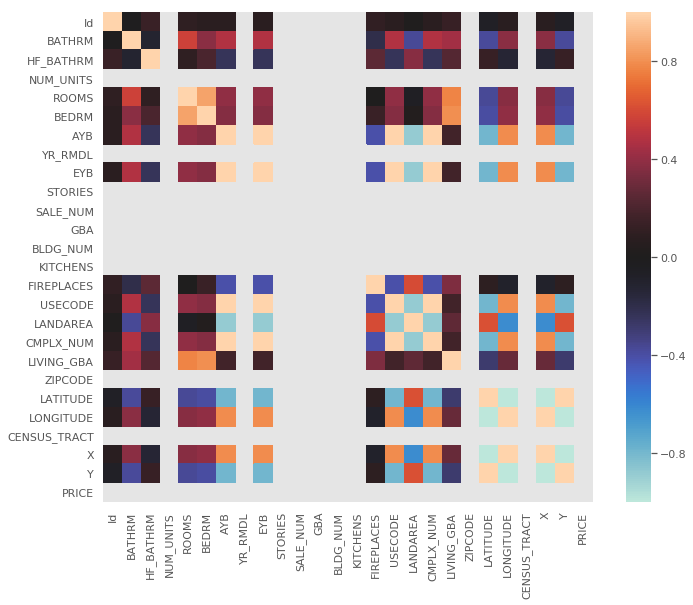

In [109]:

fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train[(df_train['PRICE'] > 53973000)].corr(), square=True, vmax=1, vmin=-1, center=0)
df_train[(df_train['PRICE'] > 53973000)].corr()

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


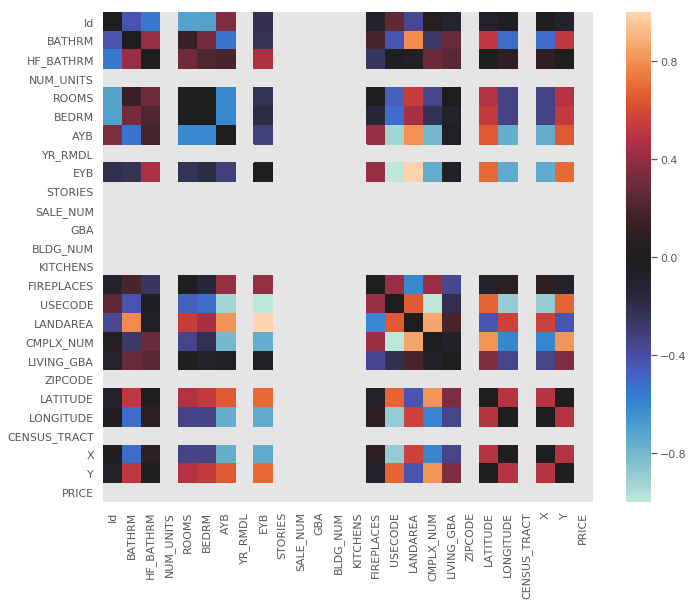

In [110]:
diff = (df_train[(df_train['PRICE'] < 53973000)].corr() - df_train[(df_train['PRICE'] > 100_000_000)].corr())


fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(diff, square=True, vmax=1, vmin=-1, center=0)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


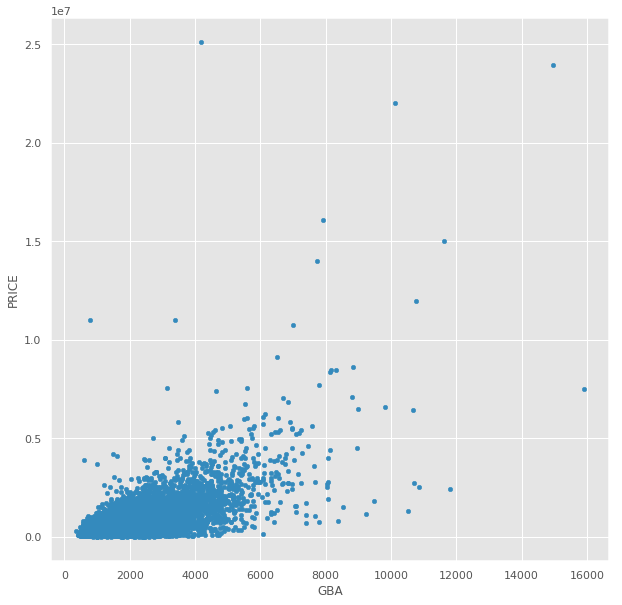

In [111]:

data = pd.DataFrame()

var = 'GBA'
data["GBA"] = df_train['GBA']
#data["LOGPRICE"] = np.log(df_train['PRICE'])
data["PRICE"] = df_train["PRICE"]


data.head()
data.plot.scatter(x=var,y="PRICE")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


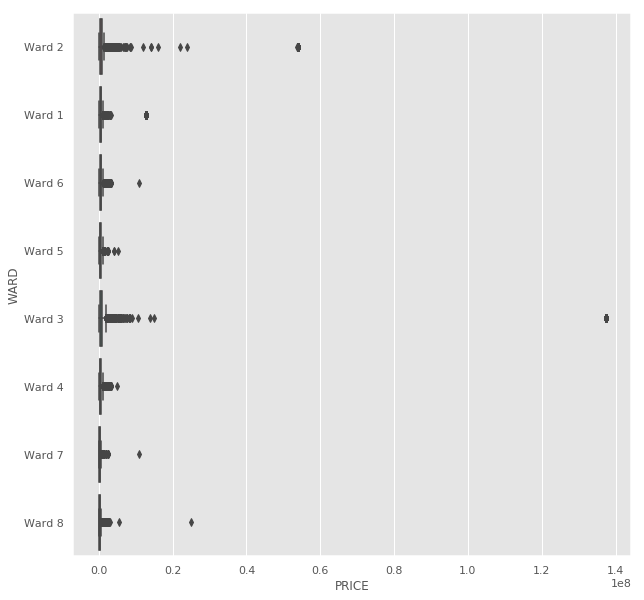

In [112]:
data["WARD"] = df_train["WARD"]
var = "WARD"
fig = sns.boxplot(x="PRICE", y="WARD", data=data)
#plt.xlim(0,5000000)

In [113]:
#fig = sns.swarmplot(x=df_train["WARD"], y=df_train["PRICE"])

In [114]:
#fig = sns.pointplot(y=df_train["WARD"], x=df_train["PRICE"])
#plt.xlim(0,1000000)

In [115]:
df_train.describe()

Id        BATHRM     HF_BATHRM     NUM_UNITS         ROOMS  \
count  49108.000000  49108.000000  49108.000000  29055.000000  49108.000000   
mean   24553.500000      1.863749      0.445752      1.222647      5.937159   
std    14176.402847      0.985460      0.575292      0.627569      2.645247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%    12276.750000      1.000000      0.000000      1.000000      4.000000   
50%    24553.500000      2.000000      0.000000      1.000000      6.000000   
75%    36830.250000      2.000000      1.000000      1.000000      7.000000   
max    49107.000000     11.000000      7.000000      6.000000     31.000000   

              BEDRM           AYB       YR_RMDL           EYB       STORIES  \
count  49108.000000  49052.000000  28690.000000  49108.000000  29037.000000   
mean       2.614605   1945.066929   2000.653050   1965.969129      2.135269   
std        1.393178     36.236955     18.155333     27.380213      5.072188   
min        0.000000   1754.000000     20.000000   1800.000000      0.000000   
25%        2.000000   1918.000000   1991.000000   1954.000000      2.000000   
50%        3.000000   1939.000000   2005.000000   1965.000000      2.000000   
75%        3.000000   1966.000000   2011.000000   1981.000000      2.000000   
max       14.000000   2018.000000   2019.000000   2018.000000    826.000000   

           SALE_NUM           GBA      BLDG_NUM      KITCHENS     FIREPLACES  \
count  49108.000000  29055.000000  49108.000000  29055.000000   49108.000000   
mean       1.864869   1731.001101      1.000143      1.255102       6.432251   
std        1.403469    842.098964      0.011938      0.689166    1326.332555   
min        1.000000    371.000000      1.000000      0.000000       0.000000   
25%        1.000000   1216.000000      1.000000      1.000000       0.000000   
50%        1.000000   1504.000000      1.000000      1.000000       0.000000   
75%        3.000000   1984.000000      1.000000      1.000000       1.000000   
max       14.000000  15902.000000      2.000000     44.000000  293920.000000   

            USECODE       LANDAREA     CMPLX_NUM    LIVING_GBA       ZIPCODE  \
count  49108.000000   49108.000000  20053.000000  20053.000000  49108.000000   
mean      14.609880    2100.559094   2447.530095    884.821822  20012.236397   
std        3.693812    2963.268001   1134.268983    405.358621     15.499051   
min       11.000000       0.000000   1001.000000    231.000000  20001.000000   
25%       11.000000     491.000000   1600.000000    620.000000  20005.000000   
50%       13.000000    1397.000000   2294.000000    783.000000  20010.000000   
75%       17.000000    2562.000000   2981.000000   1054.000000  20017.000000   
max      117.000000  187301.000000   5621.000000   5857.000000  20392.000000   

           LATITUDE     LONGITUDE  CENSUS_TRACT             X             Y  \
count  49108.000000  49108.000000  49108.000000  49061.000000  49061.000000   
mean      38.913835    -77.017993   5290.355889    -77.018026     38.913834   
std        0.030273      0.039790   3292.918040      0.039778      0.030259   
min       38.819731    -77.113909    100.000000    -77.113135     38.820576   
25%       38.895925    -77.042717   2201.000000    -77.042719     38.895729   
50%       38.913910    -77.021382   5002.000000    -77.021213     38.913907   
75%       38.933823    -76.990497   8100.000000    -76.990703     38.933756   
max       38.995435    -76.909883  11100.000000    -76.910511     38.993646   

              PRICE  
count  4.910800e+04  
mean   9.314342e+05  
std    7.001692e+06  
min    1.000000e+00  
25%    2.390000e+05  
50%    3.999990e+05  
75%    6.545000e+05  
max    1.374275e+08

In [116]:
df_train.isnull().sum()

Id                        0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             20053
ROOMS                     0
BEDRM                     0
AYB                      56
YR_RMDL               20418
EYB                       0
STORIES               20071
SALEDATE                  1
QUALIFIED                 0
SALE_NUM                  0
GBA                   20053
BLDG_NUM                  0
STYLE                 20053
STRUCT                20053
GRADE                 20053
CNDTN                 20053
EXTWALL               20053
ROOF                  20053
INTWALL               20053
KITCHENS              20053
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM             29055
LIVING_GBA            29055
FULLADDRESS           20216
CITY                  20214
STATE                 20214
ZIPCODE             

In [117]:
#df_train["PRICE"] = replace_outlier(df_train["PRICE"])

(array([4.8918e+04, 8.0000e+00, 0.0000e+00, 6.4000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1800e+02]),
 array([1.00000000e+00, 1.37427554e+07, 2.74855098e+07, 4.12282642e+07,
        5.49710186e+07, 6.87137730e+07, 8.24565274e+07, 9.61992818e+07,
        1.09942036e+08, 1.23684791e+08, 1.37427545e+08]),
 <a list of 10 Patch objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


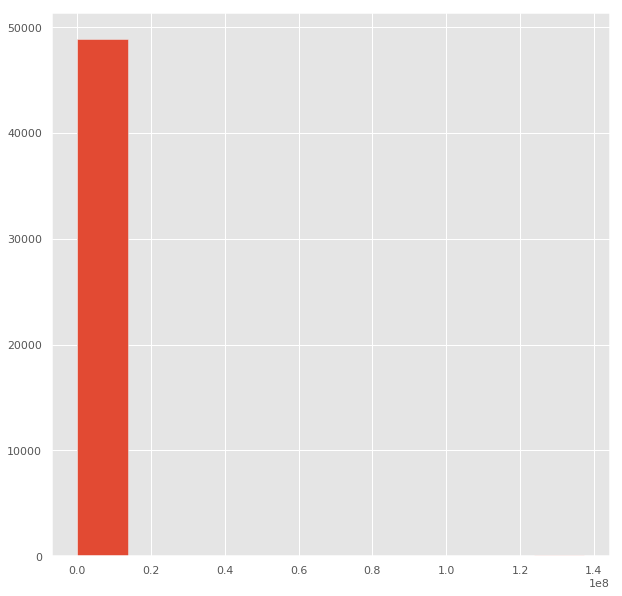

In [118]:
plt.hist(df_train["PRICE"])

In [119]:

df_train = pd.read_csv(os.path.join(os.getcwd(),'train_set.csv'))

missing = df_train.copy()
missing = missing.apply(pd.isnull, axis=0)
missing['count'] = 1
missing.groupby(['GBA','LANDAREA'
       ]).sum()

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Id  BATHRM  HF_BATHRM  HEAT   AC  NUM_UNITS  ROOMS  BEDRM  \
GBA   LANDAREA                                                               
False False     0.0     0.0        0.0   0.0  0.0        0.0    0.0    0.0   
True  False     0.0     0.0        0.0   0.0  0.0    20053.0    0.0    0.0   

                 AYB  YR_RMDL  EYB  STORIES  SALEDATE  QUALIFIED  SALE_NUM  \
GBA   LANDAREA                                                               
False False     44.0  12425.0  0.0     18.0       1.0        0.0       0.0   
True  False     12.0   7993.0  0.0  20053.0       0.0        0.0       0.0   

                BLDG_NUM    STYLE   STRUCT    GRADE    CNDTN  EXTWALL  \
GBA   LANDAREA                                                          
False False          0.0      0.0      0.0      0.0      0.0      0.0   
True  False          0.0  20053.0  20053.0  20053.0  20053.0  20053.0   

                   ROOF  INTWALL  KITCHENS  FIREPLACES  USECODE  \
GBA   LANDAREA                                                    
False False         0.0      0.0       0.0         0.0      0.0   
True  False     20053.0  20053.0   20053.0         0.0      0.0   

                GIS_LAST_MOD_DTTM  SOURCE  CMPLX_NUM  LIVING_GBA  FULLADDRESS  \
GBA   LANDAREA                                                                  
False False                   0.0     0.0    29055.0     29055.0        163.0   
True  False                   0.0     0.0        0.0         0.0      20053.0   

                   CITY    STATE  ZIPCODE  NATIONALGRID  LATITUDE  LONGITUDE  \
GBA   LANDAREA                                                                 
False False       161.0    161.0      0.0         161.0       0.0        0.0   
True  False     20053.0  20053.0      0.0       20053.0       0.0        0.0   

                ASSESSMENT_NBHD  ASSESSMENT_SUBNBHD  CENSUS_TRACT  \
GBA   LANDAREA                                                      
False False                 0.0              4005.0           0.0   
True  False                 0.0              6118.0           0.0   

                CENSUS_BLOCK  WARD  SQUARE     X     Y  QUADRANT  PRICE  count  
GBA   LANDAREA                                                                  
False False            161.0   0.0     0.0  47.0  47.0      47.0    0.0  29055  
True  False          20053.0   0.0     0.0   0.0   0.0       0.0    0.0  20053

In [120]:
df_train.columns

Index(['Id', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'PRICE'],
      dtype='object')

In [121]:
var =["STORIES","PRICE"]
df_train[var].corr()

STORIES     PRICE
STORIES  1.000000  0.026104
PRICE    0.026104  1.000000

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


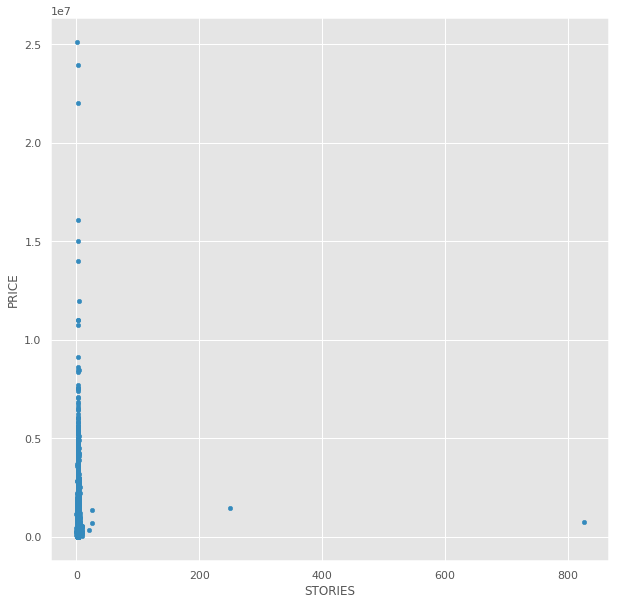

In [122]:
df_train[var].plot.scatter(x="STORIES",y="PRICE")

In [123]:
#df_train = df_train[df_train["STORIES"]<10]

In [124]:
df_train["STORIES"]

0        3.0
1        4.0
2        2.0
3        2.0
4        2.0
5        2.0
6        3.0
7        3.0
8        3.0
9        3.0
10       3.0
11       3.0
12       3.0
13       3.0
14       2.0
15       4.0
16       3.0
17       3.0
18       2.0
19       2.0
20       2.0
21       3.0
22       3.0
23       2.0
24       2.5
25       4.0
26       3.0
27       4.0
28       3.0
29       3.0
        ... 
49078    NaN
49079    NaN
49080    NaN
49081    NaN
49082    NaN
49083    NaN
49084    NaN
49085    NaN
49086    NaN
49087    NaN
49088    NaN
49089    NaN
49090    NaN
49091    NaN
49092    NaN
49093    NaN
49094    NaN
49095    NaN
49096    NaN
49097    NaN
49098    NaN
49099    NaN
49100    NaN
49101    NaN
49102    NaN
49103    NaN
49104    NaN
49105    NaN
49106    NaN
49107    NaN
Name: STORIES, Length: 49108, dtype: float64

(array([2.300e+01, 8.400e+01, 3.190e+02, 7.670e+02, 1.137e+03, 1.342e+03,
        1.480e+03, 1.835e+03, 1.749e+03, 1.621e+03, 1.139e+03, 1.317e+03,
        9.160e+02, 8.660e+02, 7.260e+02, 5.720e+02, 5.880e+02, 5.610e+02,
        4.250e+02, 4.430e+02, 3.300e+02, 2.710e+02, 2.100e+02, 1.700e+02,
        1.840e+02, 1.690e+02, 1.240e+02, 8.600e+01, 8.900e+01, 9.600e+01,
        6.200e+01, 3.400e+01, 2.600e+01, 4.200e+01, 3.100e+01, 2.700e+01,
        1.400e+01, 1.500e+01, 9.000e+00, 1.900e+01, 1.900e+01, 1.100e+01,
        8.000e+00, 6.000e+00, 9.000e+00, 5.000e+00, 8.000e+00, 4.000e+00,
        2.000e+00, 9.000e+00, 5.000e+00, 5.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+0

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


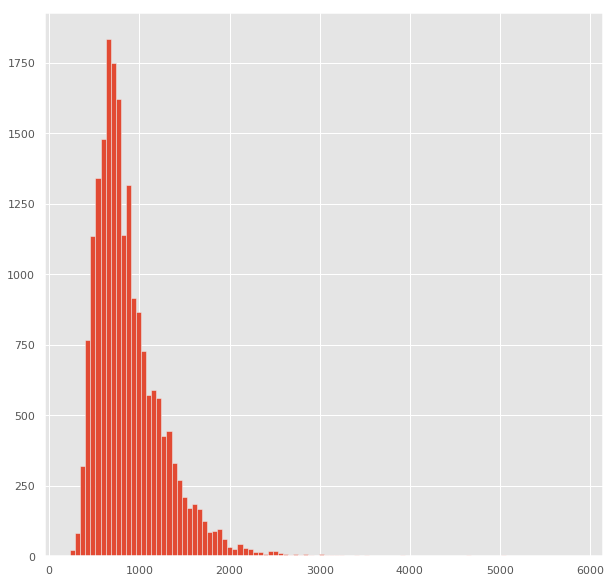

In [125]:
plt.hist(df_train["LIVING_GBA"].dropna(),bins=100)

In [126]:
df_train[["LANDAREA","GBA"]].corr()

LANDAREA      GBA
LANDAREA   1.00000  0.48597
GBA        0.48597  1.00000

In [127]:
k = 10#number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'LIVING_GBA')['LIVING_GBA'].index

df_train[cols].corr()

LIVING_GBA     ROOMS    BATHRM     BEDRM  HF_BATHRM  LANDAREA  \
LIVING_GBA    1.000000  0.764980  0.727316  0.715609   0.476452  0.447452   
ROOMS         0.764980  1.000000  0.710902  0.848081   0.395255  0.493863   
BATHRM        0.727316  0.710902  1.000000  0.708474   0.298258  0.425045   
BEDRM         0.715609  0.848081  0.708474  1.000000   0.418850  0.491251   
HF_BATHRM     0.476452  0.395255  0.298258  0.418850   1.000000  0.312446   
LANDAREA      0.447452  0.493863  0.425045  0.491251   0.312446  1.000000   
YR_RMDL       0.128732  0.178234  0.223259  0.224519   0.151806  0.098889   
AYB           0.115903 -0.223720 -0.069586 -0.247778  -0.043119 -0.083841   
EYB           0.107197  0.162961  0.246008  0.169932   0.233270  0.111138   
CMPLX_NUM     0.091610  0.045046  0.208972  0.138974   0.053285 -0.028560   

             YR_RMDL       AYB       EYB  CMPLX_NUM  
LIVING_GBA  0.128732  0.115903  0.107197   0.091610  
ROOMS       0.178234 -0.223720  0.162961   0.045046  
BATHRM      0.223259 -0.069586  0.246008   0.208972  
BEDRM       0.224519 -0.247778  0.169932   0.138974  
HF_BATHRM   0.151806 -0.043119  0.233270   0.053285  
LANDAREA    0.098889 -0.083841  0.111138  -0.028560  
YR_RMDL     1.000000  0.000390  0.227958   0.542402  
AYB         0.000390  1.000000  0.686281   0.198664  
EYB         0.227958  0.686281  1.000000   0.244053  
CMPLX_NUM   0.542402  0.198664  0.244053   1.000000

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


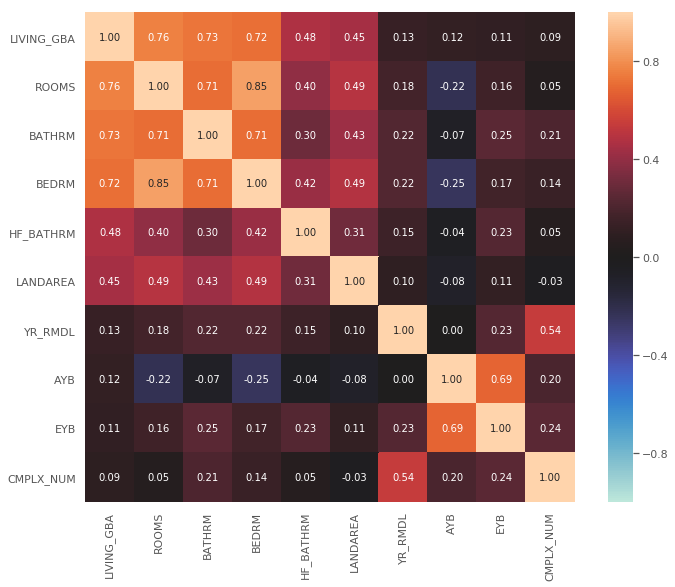

In [128]:
cm = np.corrcoef(df_train[cols].values.T)


fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train[cols].corr(), square=True, vmax=1, vmin=-1, center=0, annot=True, fmt='.2f',
           )

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


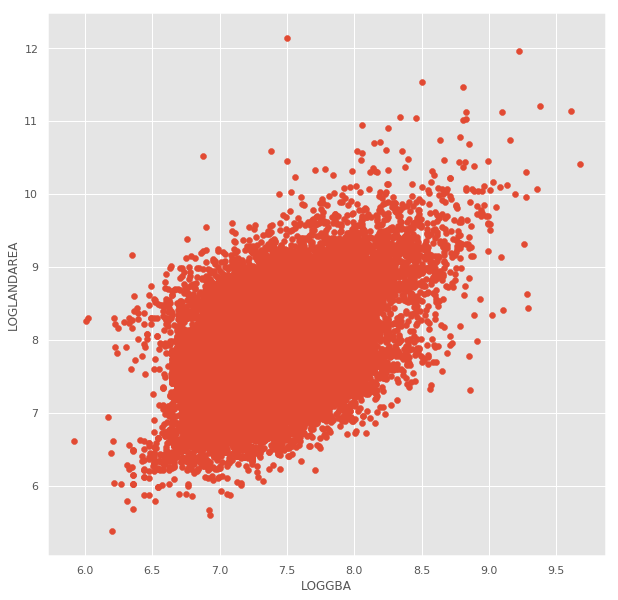

In [129]:
df_train["LOGGBA"] = np.log(df_train["GBA"])
df_train["LOGLANDAREA"] = np.log(df_train["LANDAREA"])
plt.scatter(df_train["LOGGBA"],df_train["LOGLANDAREA"])
plt.xlabel("LOGGBA")
plt.ylabel("LOGLANDAREA")


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


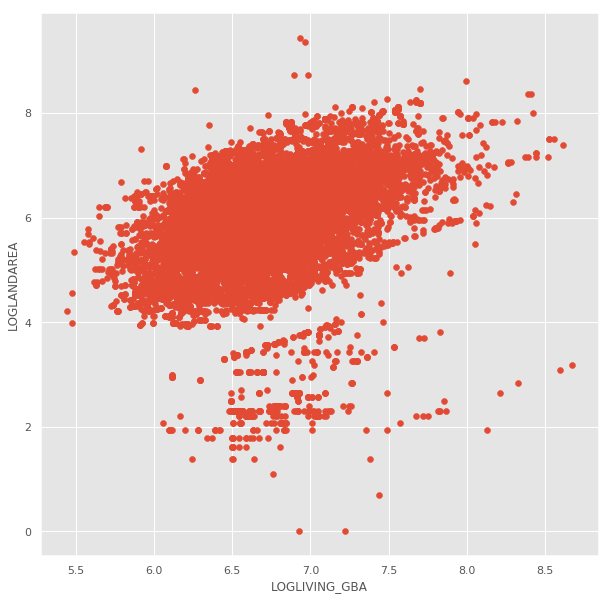

In [130]:
plt.scatter(np.log(df_train["LIVING_GBA"]),np.log(df_train["LANDAREA"]))
plt.xlabel("LOGLIVING_GBA")
plt.ylabel("LOGLANDAREA")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


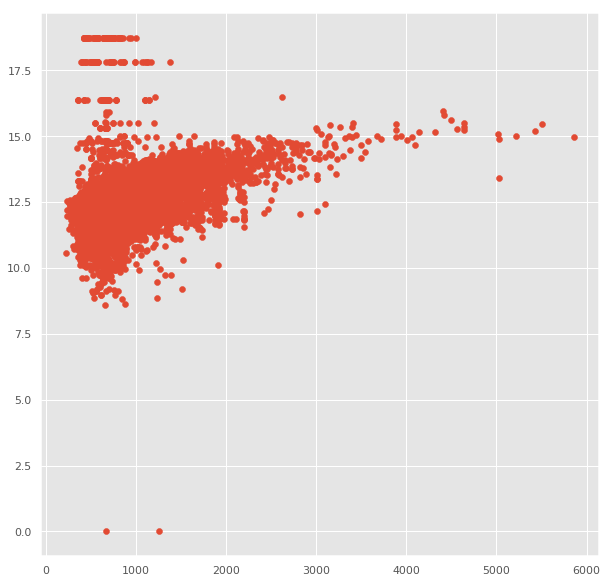

In [131]:
plt.scatter(df_train["LIVING_GBA"],np.log(df_train["PRICE"]))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

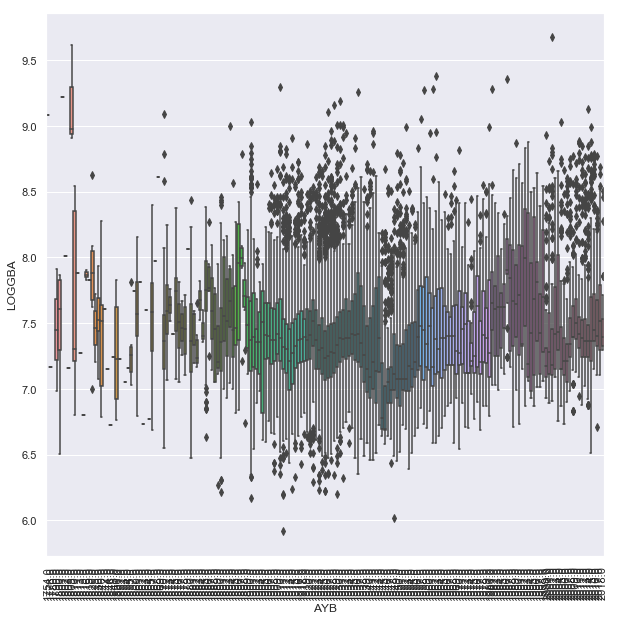

In [132]:
var = 'AYB'
data = pd.concat([df_train['LOGGBA'], df_train[var]], axis=1)
#f, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt

sns.set(font_scale=1) 
fig = sns.boxplot(x=var, y="LOGGBA", data=data)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

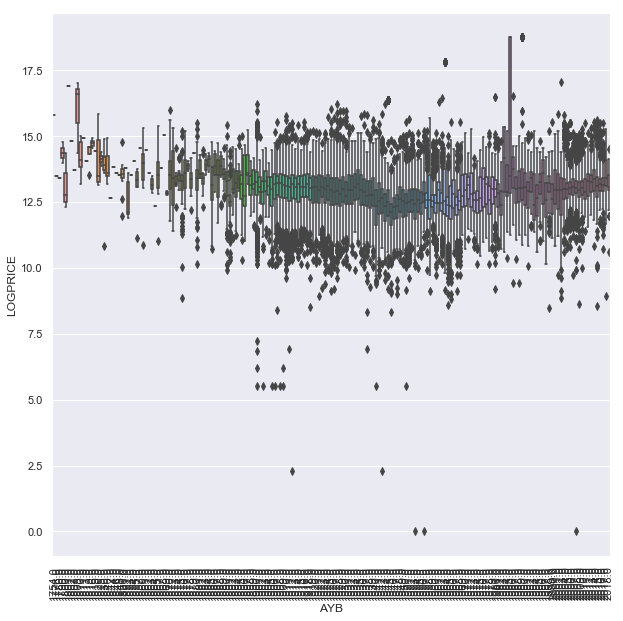

In [133]:
var = 'AYB'
df_train["LOGPRICE"] = np.log(df_train["PRICE"])
data = pd.concat([df_train['LOGPRICE'], df_train[var]], axis=1)
#f, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt

sns.set(font_scale=1) 
fig = sns.boxplot(x=var, y="LOGPRICE", data=data)
plt.xticks(rotation=90)

Null Count
Feature                       
CMPLX_NUM                29055
LIVING_GBA               29055
YR_RMDL                  20418
FULLADDRESS              20216
CITY                     20214
CENSUS_BLOCK             20214
STATE                    20214
NATIONALGRID             20214
STORIES                  20071
KITCHENS                 20053
INTWALL                  20053
GBA                      20053
ROOF                     20053
EXTWALL                  20053
NUM_UNITS                20053
CNDTN                    20053
GRADE                    20053
STRUCT                   20053
STYLE                    20053
LOGGBA                   20053
ASSESSMENT_SUBNBHD       10123
AYB                         56
X                           47
Y                           47
QUADRANT                    47
SALEDATE                     1
LOGPRICE                     0
QUALIFIED                    0
EYB                          0
BEDRM                        0
ROOMS                        0
AC                           0
HEAT                         0
HF_BATHRM                    0
BATHRM                       0
SALE_NUM                     0
FIREPLACES                   0
BLDG_NUM                     0
LOGLANDAREA                  0
USECODE                      0
LANDAREA                     0
GIS_LAST_MOD_DTTM            0
SOURCE                       0
ZIPCODE                      0
LATITUDE                     0
LONGITUDE                    0
ASSESSMENT_NBHD              0
CENSUS_TRACT                 0
WARD                         0
SQUARE                       0
PRICE                        0
Id                           0

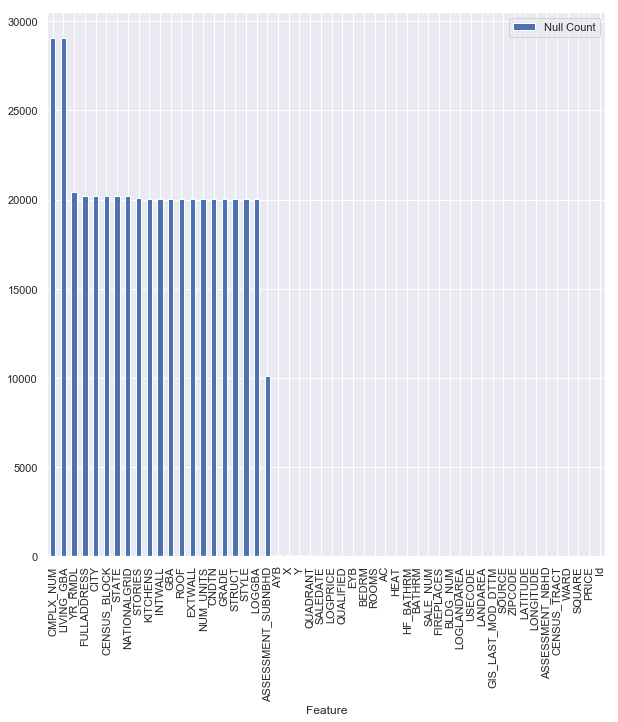

In [134]:
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls.plot.bar()

nulls

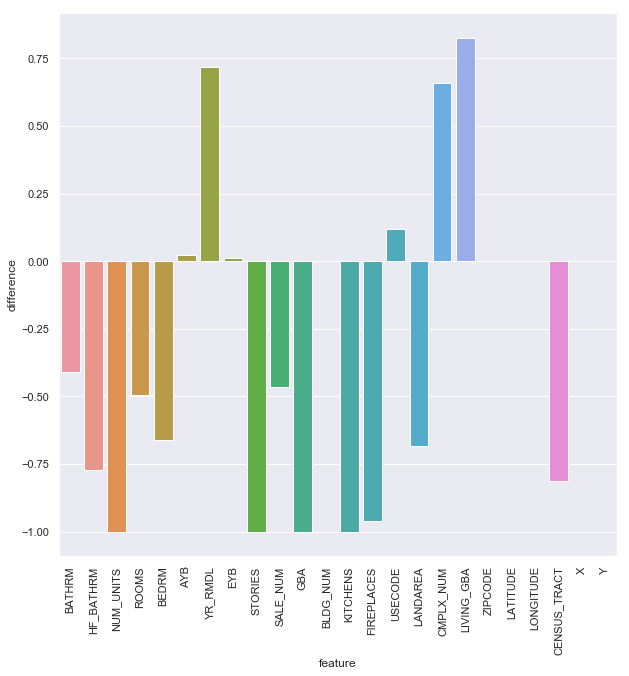

In [135]:
features = quantitative

standard = df_train[df_train['PRICE'] < 53973000]
pricey = df_train[df_train['PRICE'] >= 53973000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

In [136]:
df_train['IsNew'] = df_train['AYB'].apply(lambda x: 1 if x > 2000 else 0)
df_train['IsRMDL'] = df_train['YR_RMDL'].apply(lambda x: 1 if x > 2000 else 0)
df_train["IsLAEGE"] = df_train["LIVING_GBA"].apply(lambda x: 1 if x > 2000 else 0)

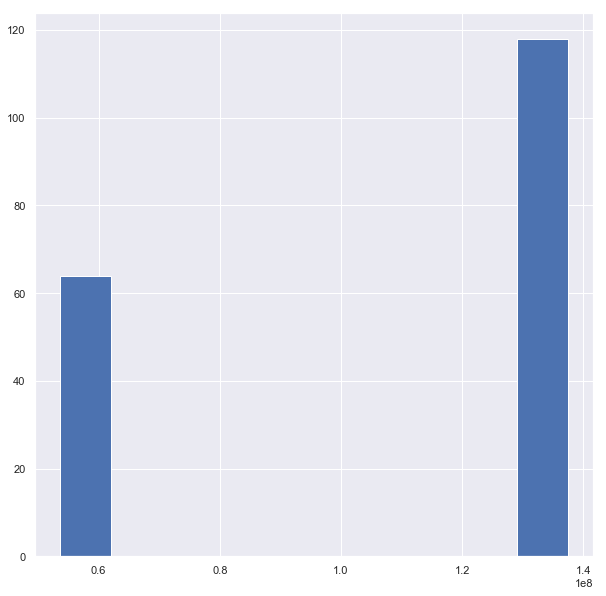

In [137]:
df_train[df_train["PRICE"]>50000000].PRICE.hist()

In [138]:
a = df_train[df_train["PRICE"]<10000]

In [139]:
a

Id  BATHRM  HF_BATHRM            HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
127      127       3          0   Hot Water Rad  N        3.0     11      3   
988      988       2          1   Hot Water Rad  N        1.0      9      4   
1237    1237       1          1   Hot Water Rad  Y        1.0      6      3   
2218    2218       3          1      Forced Air  Y        2.0     10      5   
5083    5083       1          0   Hot Water Rad  N        1.0      6      3   
12702  12702       2          1       Warm Cool  Y        1.0      8      4   
13754  13754       2          0      Forced Air  N        1.0      8      5   
14044  14044       2          0   Hot Water Rad  N        2.0      8      2   
14055  14055       2          0   Hot Water Rad  N        2.0      6      2   
14660  14660       1          0   Hot Water Rad  N        1.0      6      3   
15360  15360       4          0      Forced Air  Y        2.0      8      4   
15575  15575       5          2      Forced Air  Y        2.0     10      6   
17070  17070       2          1      Forced Air  Y        2.0      8      4   
22471  22471       1          0   Hot Water Rad  N        1.0      5      2   
23173  23173       2          0   Hot Water Rad  Y        2.0      8      2   
23825  23825       2          1      Forced Air  Y        1.0     10      4   
24072  24072       2          1      Forced Air  Y        1.0      7      4   
24304  24304       1          1   Hot Water Rad  N        1.0      7      3   
24684  24684       1          0   Hot Water Rad  N        1.0      6      3   
25733  25733       1          0      Forced Air  N        1.0      7      3   
25900  25900       1          0  Gravity Furnac  N        1.0      6      3   
26336  26336       1          0       Warm Cool  Y        1.0      6      2   
27169  27169       1          2       Warm Cool  Y        1.0      7      3   
27433  27433       4          0   Hot Water Rad  Y        4.0     16      4   
27985  27985       4          0      Forced Air  N        4.0     16      4   
28045  28045       1          0      Air Exchng  N        1.0      5      2   
29050  29050       3          0      Forced Air  N        3.0     14      6   
29122  29122       1          0      Forced Air  Y        NaN      2      0   
29130  29130       1          0      Forced Air  Y        NaN      4      2   
29195  29195       1          0      Forced Air  Y        NaN      4      1   
29384  29384       1          0  Water Base Brd  Y        NaN      4      2   
29830  29830       1          0   Hot Water Rad  N        NaN      3      1   
30093  30093       1          0      Forced Air  Y        NaN      4      2   
35145  35145       1          0      Forced Air  Y        NaN      4      2   
35386  35386       1          0         Ht Pump  Y        NaN      3      1   
36850  36850       1          0   Hot Water Rad  N        NaN      4      1   
37578  37578       1          0      Forced Air  Y        NaN      4      2   
38579  38579       2          0      Forced Air  Y        NaN      4      2   
38956  38956       1          0       Warm Cool  Y        NaN      3      1   
39034  39034       2          1       Warm Cool  Y        NaN      6      3   
39309  39309       1          0       Warm Cool  Y        NaN      3      1   
43003  43003       1          0   Hot Water Rad  N        NaN      3      1   
45134  45134       1          0      Forced Air  Y        NaN      3      1   
48380  48380       1          1      Forced Air  Y        NaN      3      1   

          AYB  YR_RMDL   EYB  STORIES             SALEDATE QUALIFIED  \
127    1907.0      NaN  1954     3.00  2002-04-24 00:00:00         U   
988    1900.0   1996.0  1969     2.00  1996-11-21 00:00:00         U   
1237   1900.0   2004.0  1960     2.00  2000-02-08 00:00:00         U   
2218   1900.0      NaN  1957     2.00  1997-02-19 00:00:00         U   
5083   1918.0      NaN  1960     2.00  1998-11-13 00:00:00         U   
12702  1937.0      NaN

In [237]:
df_res = df_train[df_train["SOURCE"] == "Residential"]

In [63]:
df_res

Id  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0          0       3          1  Hot Water Rad  Y        2.0      9      5   
1          1       3          2  Hot Water Rad  Y        1.0     10      5   
2          2       3          1      Warm Cool  Y        2.0      5      3   
3          3       3          1      Warm Cool  Y        1.0      8      3   
4          4       3          1  Hot Water Rad  Y        2.0      9      3   
5          5       2          1     Forced Air  Y        1.0      5      3   
6          6       3          0  Hot Water Rad  Y        4.0      9      3   
7          7       2          2      Warm Cool  Y        2.0      8      4   
8          8       3          1     Forced Air  Y        2.0      9      4   
9          9       3          2     Forced Air  Y        2.0     10      4   
10        10       3          1     Forced Air  Y        2.0     10      5   
11        11       3          1      Warm Cool  Y        2.0      9      4   
12        12       2          1     Forced Air  N        2.0      8      3   
13        13       1          1     Forced Air  Y        2.0      4      2   
14        14       1          0  Hot Water Rad  N        2.0      4      1   
15        15       4          2  Elec Base Brd  Y        3.0     11      5   
16        16       3          1  Hot Water Rad  N        3.0     10      4   
17        17       3          0     Forced Air  Y        2.0     10      4   
18        18       2          0      Warm Cool  Y        2.0      6      3   
19        19       2          1      Warm Cool  Y        2.0     11      4   
20        20       2          1      Warm Cool  Y        1.0      6      2   
21        21       6          0  Hot Water Rad  N        4.0     18      4   
22        22       4          1      Warm Cool  Y        2.0      8      4   
23        23       2          1      Warm Cool  Y        1.0      7      3   
24        24       4          1      Warm Cool  Y        2.0     11      5   
25        25       4          3      Warm Cool  Y        1.0     16      5   
26        26       4          1  Hot Water Rad  Y        2.0     11      6   
27        27       4          4  Hot Water Rad  Y        2.0     11      6   
28        28       3          1  Hot Water Rad  N        3.0     10      4   
29        29       3          0      Warm Cool  Y        1.0      8      4   
...      ...     ...        ...            ... ..        ...    ...    ...   
29025  29025       1          1     Forced Air  N        1.0      6      2   
29026  29026       2          0     Forced Air  Y        1.0      6      2   
29027  29027       2          1      Warm Cool  Y        1.0      7      5   
29028  29028       1          1      Warm Cool  Y        1.0      7      3   
29029  29029       1          1      Warm Cool  Y        1.0      7      3   
29030  29030       1          0     Forced Air  N        1.0      4      2   
29031  29031       1          0      Warm Cool  Y        1.0      4      2   
29032  29032       1          0     Forced Air  N        1.0      4      2   
29033  29033       1          0     Forced Air  N        1.0      4      2   
29034  29034       1          1      Warm Cool  Y        1.0      5      2   
29035  29035       1          1      Warm Cool  Y        1.0      6      3   
29036  29036       1          1      Warm Cool  Y        1.0      6      4   
29037  29037       1          1      Warm Cool  Y        1.0      6      3   
29038  29038       2          1     Forced Air  Y        1.0      6      3   
29039  29039       1          1      Warm Cool  Y        1.0      7      3   
29040  29040       2          0      Warm Cool  Y        1.0      6      4   
29041  29041       2          1     Forced Air  Y        1.0      8      4   
29042  29042       1          1      Warm Cool  Y        1.0      7      3   
29043  29043       1          0  Hot Water Rad  Y        1.0      7      2   
29044  29044       2          1 

In [64]:
df_con = df_train[df_train["SOURCE"] == "Condominium"]
df_con

Id  BATHRM  HF_BATHRM        HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
29055  29055       2          0  Forced Air  Y        NaN      4      2   
29056  29056       2          0  Forced Air  Y        NaN      4      2   
29057  29057       2          0  Forced Air  Y        NaN      4      2   
29058  29058       2          0  Forced Air  Y        NaN      4      2   
29059  29059       2          0  Forced Air  Y        NaN      4      2   
29060  29060       2          0  Forced Air  Y        NaN      4      2   
29061  29061       1          1  Forced Air  Y        NaN      4      2   
29062  29062       1          0  Forced Air  Y        NaN      3      1   
29063  29063       1          0  Forced Air  Y        NaN      3      1   
29064  29064       1          0  Forced Air  Y        NaN      3      1   
29065  29065       1          0  Forced Air  Y        NaN      3      1   
29066  29066       1          0  Forced Air  Y        NaN      4      2   
29067  29067       1          0  Forced Air  Y        NaN      2      0   
29068  29068       2          0  Forced Air  Y        NaN      4      2   
29069  29069       1          0  Forced Air  Y        NaN      4      1   
29070  29070       1          0  Forced Air  Y        NaN      3      1   
29071  29071       2          0  Forced Air  Y        NaN      4      2   
29072  29072       1          0  Forced Air  Y        NaN      4      1   
29073  29073       1          0  Forced Air  Y        NaN      3      1   
29074  29074       1          0   Warm Cool  Y        NaN      3      1   
29075  29075       1          0   Warm Cool  Y        NaN      3      1   
29076  29076       1          0   Warm Cool  Y        NaN      2      0   
29077  29077       1          1   Warm Cool  Y        NaN      3      1   
29078  29078       1          1   Warm Cool  Y        NaN      5      2   
29079  29079       1          0   Warm Cool  Y        NaN      4      1   
29080  29080       1          0   Warm Cool  Y        NaN      2      0   
29081  29081       1          0   Warm Cool  Y        NaN      3      1   
29082  29082       1          0   Warm Cool  Y        NaN      3      1   
29083  29083       1          1   Warm Cool  Y        NaN      5      2   
29084  29084       2          0   Warm Cool  Y        NaN      5      2   
...      ...     ...        ...         ... ..        ...    ...    ...   
49078  49078       1          0  Forced Air  Y        NaN      3      1   
49079  49079       2          0  Forced Air  Y        NaN      5      2   
49080  49080       1          0  Forced Air  Y        NaN      3      1   
49081  49081       1          0  Forced Air  Y        NaN      3      1   
49082  49082       2          0     Ht Pump  Y        NaN      4      2   
49083  49083       2          0  Forced Air  Y        NaN      4      2   
49084  49084       2          0  Forced Air  Y        NaN      5      2   
49085  49085       2          0  Forced Air  Y        NaN      4      2   
49086  49086       1          0  Forced Air  Y        NaN      3      1   
49087  49087       1          0  Forced Air  Y        NaN      3      1   
49088  49088       1          0  Forced Air  Y        NaN      4      1   
49089  49089       1          0  Forced Air  Y        NaN      4      1   
49090  49090       2          0  Forced Air  Y        NaN      4      2   
49091  49091       1          0  Forced Air  Y        NaN      3      1   
49092  49092       2          1  Forced Air  Y        NaN      4      2   
49093  49093       2          1  Forced Air  Y        NaN      4      2   
49094  49094       3          1     Ht Pump  Y        NaN      5      3   
49095  49095       3          1     Ht Pump  Y        NaN      5      3   
49096  49096       1          0     Ht Pump  Y        NaN      5      2   
49097  49097       2          1     Ht Pump  Y        NaN      5      2   
49098  49098       2          1     Ht Pump  Y        NaN      5      2   
49099  49099       2          0  Fo

In [93]:
df_train.CENSUS_TRACT.unique()

array([ 4201.,  5201.,  4300.,  5500.,  4202.,  5600.,  4400.,  5301.,
       10700., 10800.,  5001.,  5002.,  4801.,  4802.,  4901.,  6400.,
        4902., 10200.,  4600.,  4701.,  7200.,  8200.,  7000.,  8301.,
        6500.,  4702., 11000., 10600.,  8302.,  6600.,  8100.,  8410.,
        8402.,  6700.,  6900.,  8001.,  8002.,  7100.,  6802.,  6801.,
         202.,   100.,  6804.,   300.,   702.,   802.,   801.,   902.,
         901.,  1001.,  1100.,  1002.,  1200.,   701.,   600.,  1500.,
        1302.,  1401.,   400.,  1402.,  1301.,   502.,  4100.,  4001.,
         501.,  2701.,  3800.,  4002.,  2702.,  2600.,  3900.,  2801.,
        2502.,  2501.,  2802.,  3700.,  2001.,  1804.,  1803.,  1600.,
        2002.,  2900.,  3000.,  3100.,  3600.,  3500.,  1901.,  2101.,
        2201., 10300.,  2400.,  1702.,  3200.,  3400.,  3302.,  3301.,
        2102.,  2301.,  2202.,  1902.,  8701.,  9203.,  9505.,  9204.,
        9201.,  9501.,  8702.,  9508.,  9507.,  9509.,  9504.,  9302.,
      

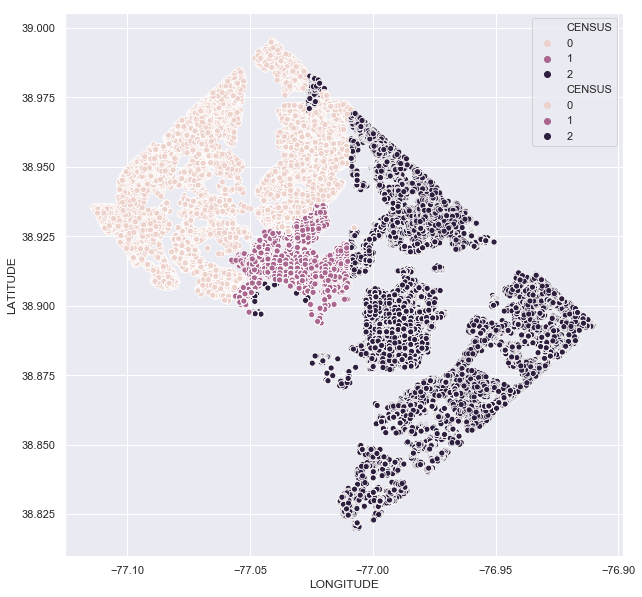

In [140]:
def func_cate(x):
    if  x < 3000:
        return 0
    elif x >= 3000 and x < 6000:
        return 1
    else:
        return 2


df_train['CENSUS'] = df_train['CENSUS_TRACT'].apply(func_cate)
df_all['CENSUS'] = df_all['CENSUS_TRACT'].apply(func_cate)
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="CENSUS")


In [186]:
def func_cate(x):
    if  x < 1000000:
        return 0
    elif x >= 1000000 and x < 53973000:
        return 1
    else:
        return 2


df_train['PRICE_GRADE'] = df_train['PRICE'].apply(func_cate)
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="PRICE_GRADE")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


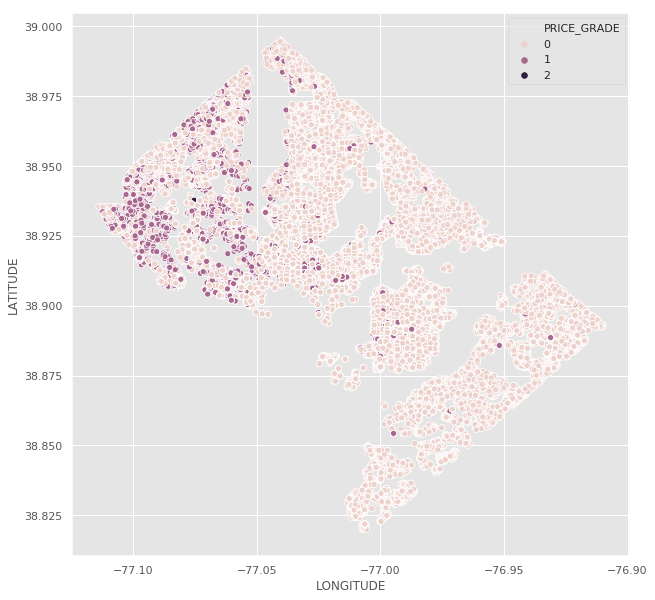

In [187]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="PRICE_GRADE")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


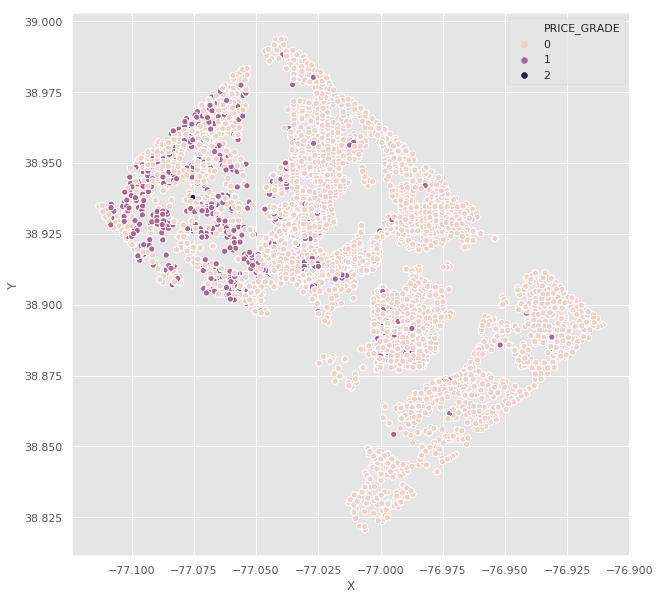

In [188]:
sns.scatterplot(x="X", y="Y", data=df_train,hue="PRICE_GRADE")

In [68]:
df_train.columns

Index(['Id', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'PRICE',
       'PRICE_GRADE'],
      dtype='object')

In [69]:
df_train

Id  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0          0       3          1  Hot Water Rad  Y        2.0      9      5   
1          1       3          2  Hot Water Rad  Y        1.0     10      5   
2          2       3          1      Warm Cool  Y        2.0      5      3   
3          3       3          1      Warm Cool  Y        1.0      8      3   
4          4       3          1  Hot Water Rad  Y        2.0      9      3   
5          5       2          1     Forced Air  Y        1.0      5      3   
6          6       3          0  Hot Water Rad  Y        4.0      9      3   
7          7       2          2      Warm Cool  Y        2.0      8      4   
8          8       3          1     Forced Air  Y        2.0      9      4   
9          9       3          2     Forced Air  Y        2.0     10      4   
10        10       3          1     Forced Air  Y        2.0     10      5   
11        11       3          1      Warm Cool  Y        2.0      9      4   
12        12       2          1     Forced Air  N        2.0      8      3   
13        13       1          1     Forced Air  Y        2.0      4      2   
14        14       1          0  Hot Water Rad  N        2.0      4      1   
15        15       4          2  Elec Base Brd  Y        3.0     11      5   
16        16       3          1  Hot Water Rad  N        3.0     10      4   
17        17       3          0     Forced Air  Y        2.0     10      4   
18        18       2          0      Warm Cool  Y        2.0      6      3   
19        19       2          1      Warm Cool  Y        2.0     11      4   
20        20       2          1      Warm Cool  Y        1.0      6      2   
21        21       6          0  Hot Water Rad  N        4.0     18      4   
22        22       4          1      Warm Cool  Y        2.0      8      4   
23        23       2          1      Warm Cool  Y        1.0      7      3   
24        24       4          1      Warm Cool  Y        2.0     11      5   
25        25       4          3      Warm Cool  Y        1.0     16      5   
26        26       4          1  Hot Water Rad  Y        2.0     11      6   
27        27       4          4  Hot Water Rad  Y        2.0     11      6   
28        28       3          1  Hot Water Rad  N        3.0     10      4   
29        29       3          0      Warm Cool  Y        1.0      8      4   
...      ...     ...        ...            ... ..        ...    ...    ...   
49078  49078       1          0     Forced Air  Y        NaN      3      1   
49079  49079       2          0     Forced Air  Y        NaN      5      2   
49080  49080       1          0     Forced Air  Y        NaN      3      1   
49081  49081       1          0     Forced Air  Y        NaN      3      1   
49082  49082       2          0        Ht Pump  Y        NaN      4      2   
49083  49083       2          0     Forced Air  Y        NaN      4      2   
49084  49084       2          0     Forced Air  Y        NaN      5      2   
49085  49085       2          0     Forced Air  Y        NaN      4      2   
49086  49086       1          0     Forced Air  Y        NaN      3      1   
49087  49087       1          0     Forced Air  Y        NaN      3      1   
49088  49088       1          0     Forced Air  Y        NaN      4      1   
49089  49089       1          0     Forced Air  Y        NaN      4      1   
49090  49090       2          0     Forced Air  Y        NaN      4      2   
49091  49091       1          0     Forced Air  Y        NaN      3      1   
49092  49092       2          1     Forced Air  Y        NaN      4      2   
49093  49093       2          1     Forced Air  Y        NaN      4      2   
49094  49094       3          1        Ht Pump  Y        NaN      5      3   
49095  49095       3          1        Ht Pump  Y        NaN      5      3   
49096  49096       1          0        Ht Pump  Y        NaN      5      2   
49097  49097       2          1 

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


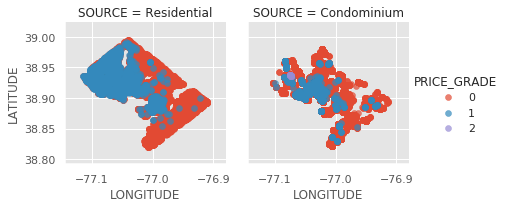

In [78]:
g = sns.FacetGrid(df_train, col="SOURCE", hue="PRICE_GRADE")
g.map(plt.scatter, "LONGITUDE", "LATITUDE", alpha=.7)
g.add_legend();

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


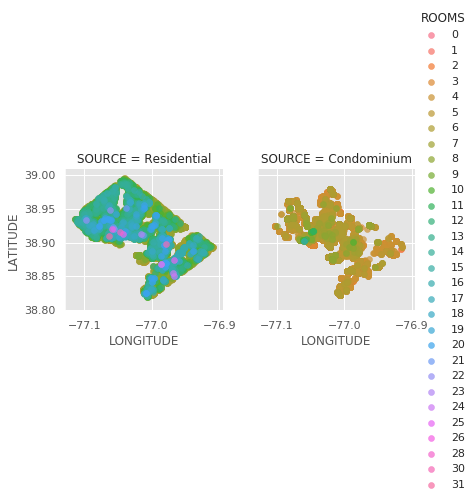

In [71]:
g = sns.FacetGrid(df_train, col="SOURCE", hue="ROOMS")
g.map(plt.scatter, "LONGITUDE", "LATITUDE", alpha=.7)
g.add_legend();

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


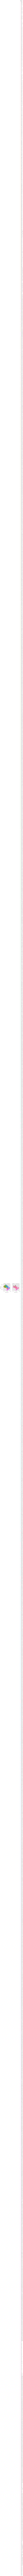

In [97]:
g = sns.FacetGrid(df_train, col="SOURCE", hue="SQUARE")
g.map(plt.scatter, "LONGITUDE", "LATITUDE", alpha=.7)
g.add_legend();

In [81]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="SQUARE")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [82]:
df_train.SALEDATE

0        2016-06-21 00:00:00
1        2010-02-26 00:00:00
2        2011-09-30 00:00:00
3        2010-11-04 00:00:00
4        2001-07-23 00:00:00
5        2012-08-21 00:00:00
6        2005-04-06 00:00:00
7        1997-10-20 00:00:00
8        2015-09-16 00:00:00
9        2017-05-01 00:00:00
10       2001-11-08 00:00:00
11       2011-03-18 00:00:00
12       1999-12-03 00:00:00
13       1997-09-26 00:00:00
14       2010-07-02 00:00:00
15       2014-03-05 00:00:00
16       1999-02-03 00:00:00
17       2005-01-29 00:00:00
18       2007-03-21 00:00:00
19       2013-10-30 00:00:00
20       2005-03-15 00:00:00
21       2017-11-08 00:00:00
22       2015-11-30 00:00:00
23       2014-08-19 00:00:00
24       1997-11-04 00:00:00
25       2008-04-15 00:00:00
26       2017-12-28 00:00:00
27       2007-12-13 00:00:00
28       2005-10-18 00:00:00
29       2013-06-21 00:00:00
                ...         
49078    2015-09-28 00:00:00
49079    2007-01-23 00:00:00
49080    2012-11-26 00:00:00
49081    2012-

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

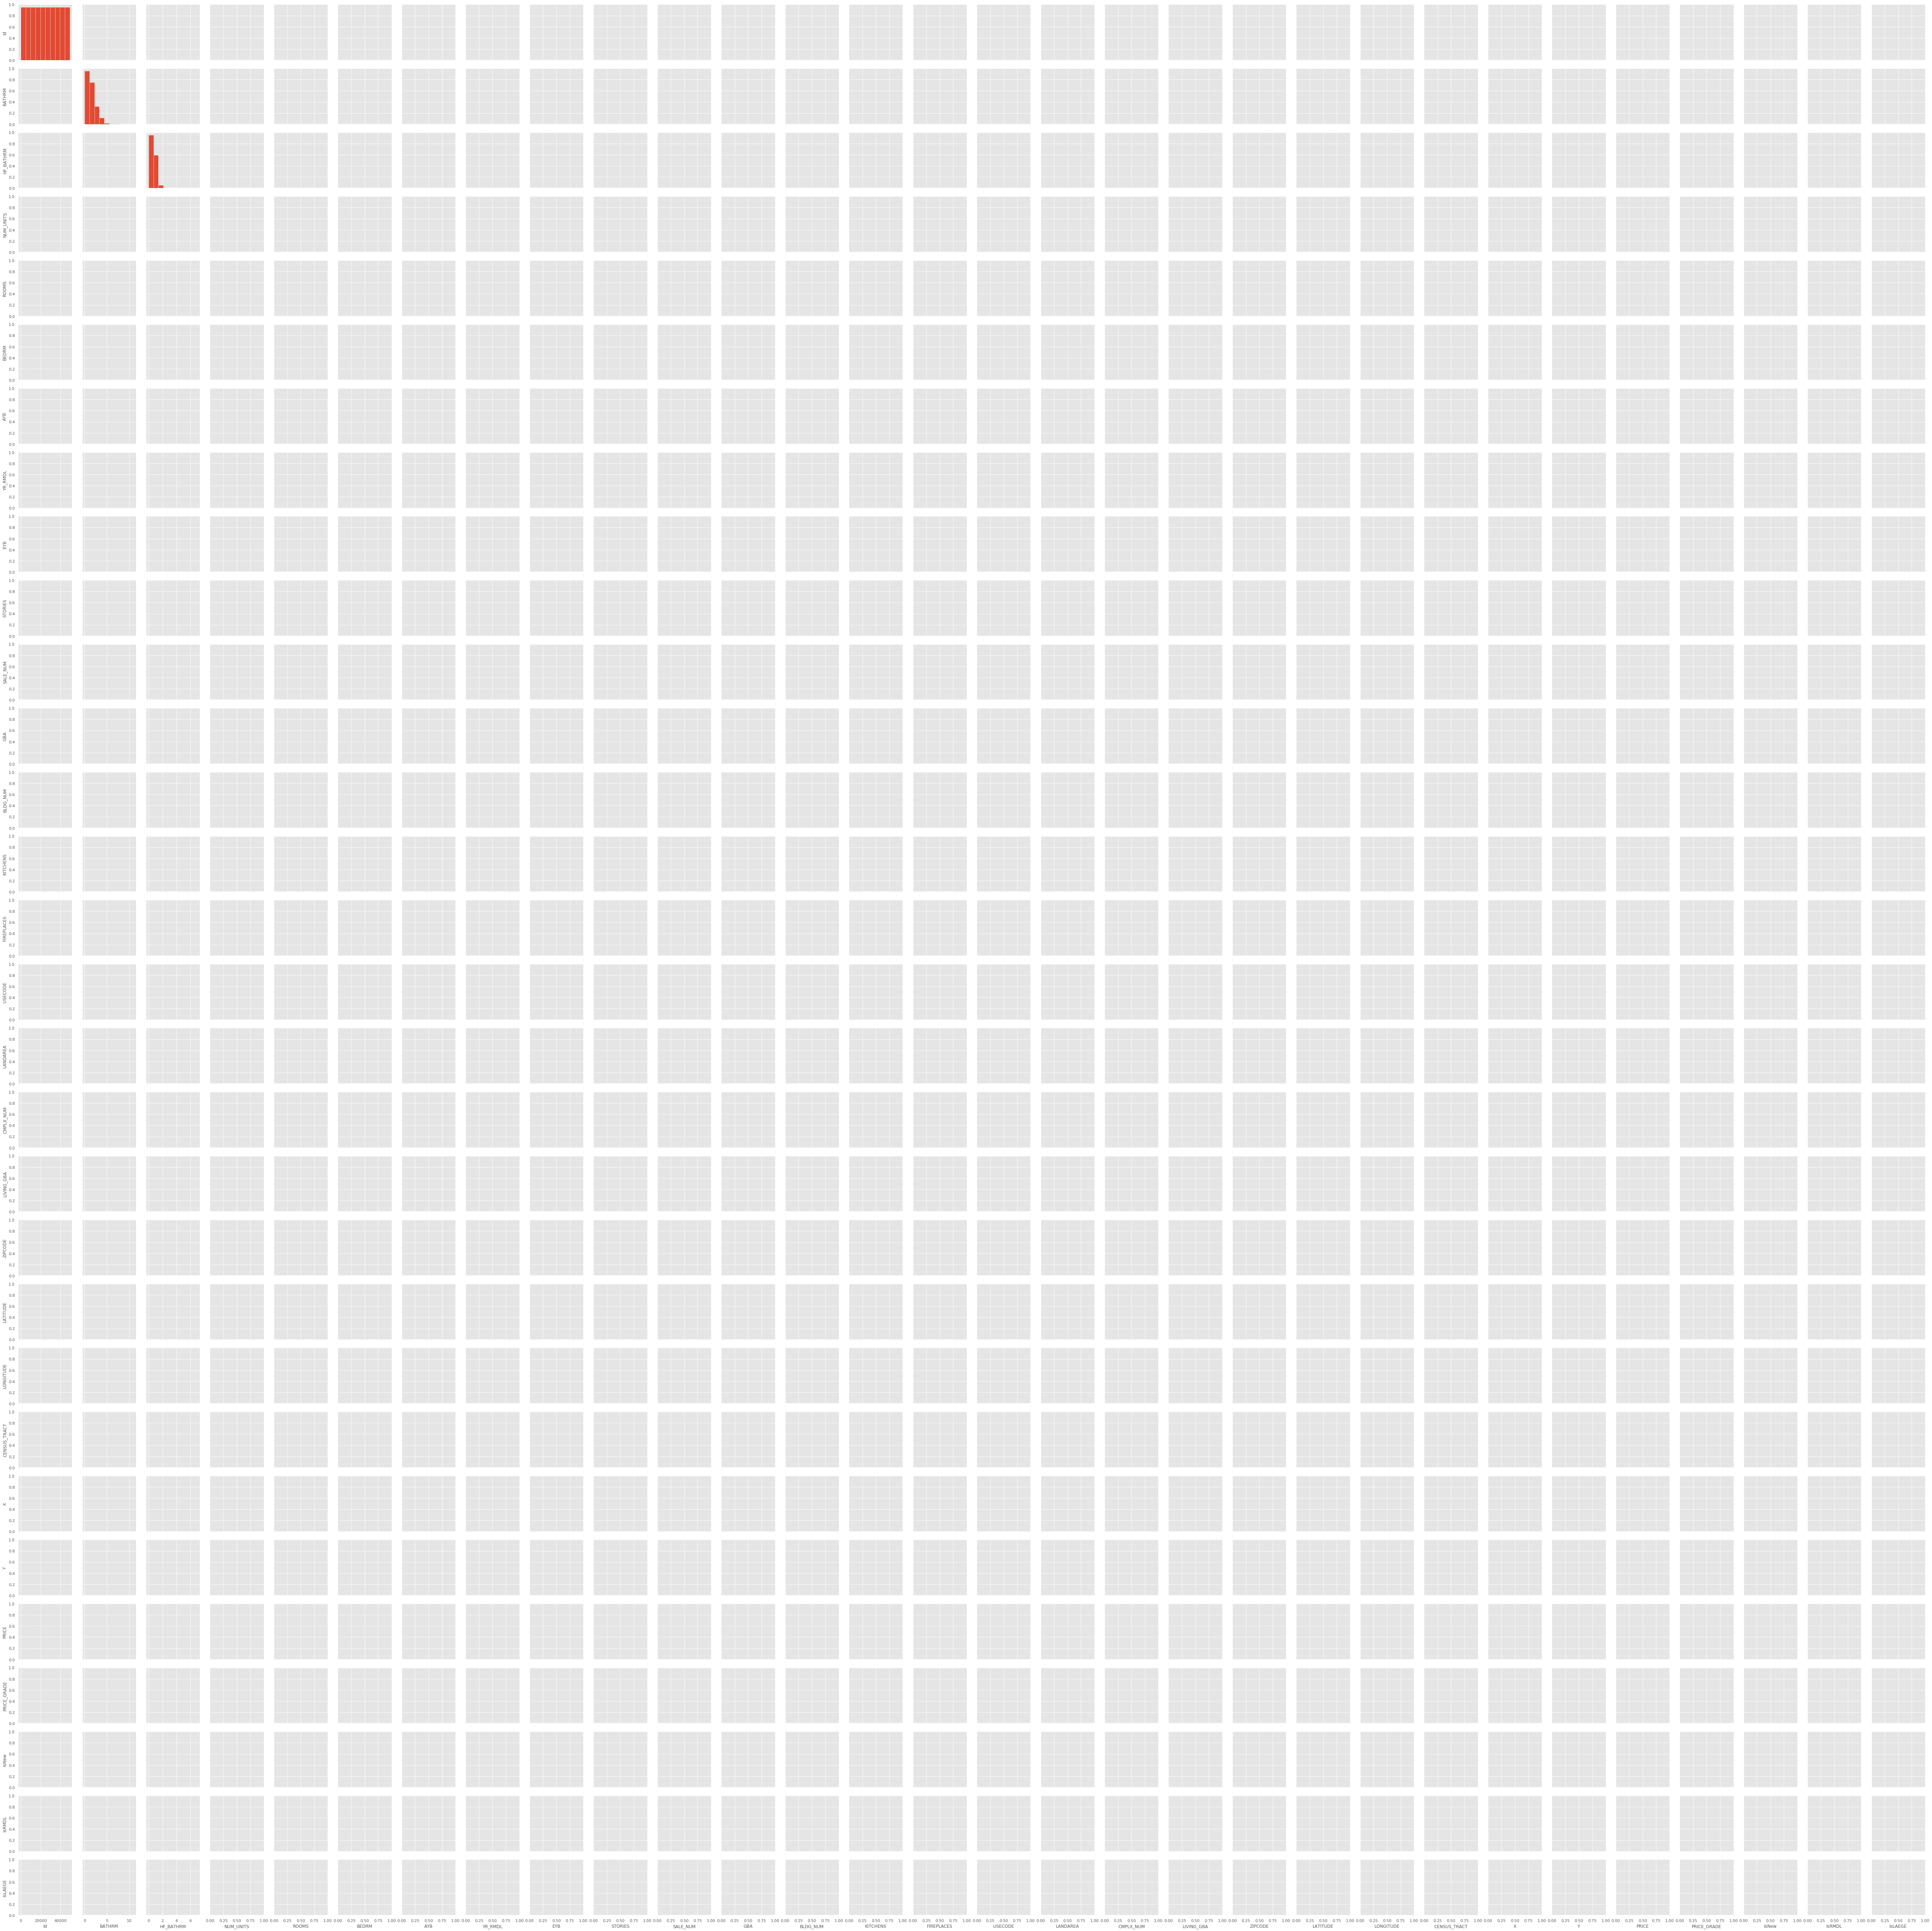

In [83]:
sns.pairplot(df_train)

In [87]:
df_train = df_train[df_train["PRICE"]>53973000]

In [167]:
df_train

Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  \
0                0       4          0      Warm Cool  Y        2.0      8   
1                1       3          1      Warm Cool  Y        2.0     11   
2                2       3          1  Hot Water Rad  Y        2.0      9   
3                3       3          1  Hot Water Rad  Y        2.0      8   
4                4       2          1      Warm Cool  Y        1.0     11   
5                5       3          2  Hot Water Rad  Y        1.0     10   
6                6       1          0      Warm Cool  Y        2.0      5   
7                7       3          1  Hot Water Rad  Y        2.0      8   
8                8       3          1      Warm Cool  Y        2.0      7   
9                9       1          1  Hot Water Rad  Y        1.0      6   
10              10       3          0     Forced Air  N        3.0     12   
11              11       5          0  Hot Water Rad  Y        3.0     16   
12              12       2          0  Hot Water Rad  N        2.0      9   
13              13       2          0      Warm Cool  Y        2.0     11   
14              14       3          1      Warm Cool  Y        2.0      5   
15              15       2          1      Warm Cool  Y        2.0      9   
16              16       3          1      Warm Cool  Y        1.0      8   
17              17       2          0  Hot Water Rad  N        1.0      6   
18              18       3          1  Hot Water Rad  Y        2.0     10   
19              19       3          1  Hot Water Rad  Y        2.0      9   
20              20       3          1  Hot Water Rad  Y        1.0     14   
21              21       3          0     Forced Air  Y        2.0     12   
22              22       1          0     Forced Air  Y        1.0      6   
23              23       2          1     Forced Air  Y        1.0      5   
24              24       2          1  Hot Water Rad  Y        1.0      8   
25              25       1          0  Hot Water Rad  N        1.0      8   
26              26       1          0  Hot Water Rad  N        1.0     10   
27              27       3          0  Hot Water Rad  Y        4.0      9   
28              28       3          0      Warm Cool  Y        2.0     10   
29              29       3          1     Forced Air  Y        2.0     11   
...            ...     ...        ...            ... ..        ...    ...   
158927      158927       2          0        Ht Pump  Y        NaN      6   
158928      158928       2          1        Ht Pump  Y        NaN      5   
158929      158929       2          1        Ht Pump  Y        NaN      5   
158930      158930       2          0     Forced Air  N        NaN      4   
158931      158931       2          1     Forced Air  N        NaN      4   
158932      158932       2          1     Forced Air  N        NaN      4   
158933      158933       2          0        Ht Pump  Y        NaN      4   
158934      158934       1          1        Ht Pump  Y        NaN      3   
158935      158935       1          0        Ht Pump  Y        NaN      3   
158936      158936       1          0        Ht Pump  Y        NaN      3   
158937      158937       1          0     Forced Air  Y        NaN      4   
158938      158938       2          0      Warm Cool  Y        NaN      7   
158939      158939       1          0     Forced Air  Y        NaN      4   
158940      158940       2          0     Forced Air  Y        NaN      7   
158941      158941       1          0     Forced Air  Y        NaN      4   
158942      158942       2          0     Forced Air  Y        NaN      7   
158943      158943       2          1     Forced Air  Y        NaN      5   
158944      158944       2          1     Forced Air  Y        NaN      5   
158945      158945       1          0     Forced Air  Y        NaN      3   
158946      158946       1          0     Forced Air  Y        NaN      4   
1589

In [96]:
df_train.SQUARE.unique()

array([152, 208, 191, ..., 486, 502, 456], dtype=object)

In [172]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="SQUARE")


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [157]:
df_train = pd.read_csv(os.path.join(os.getcwd(),'train_set_fixed.csv'), delim_whitespace=False)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [163]:
df_train

Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  \
0                0       4          0      Warm Cool  Y        2.0      8   
1                1       3          1      Warm Cool  Y        2.0     11   
2                2       3          1  Hot Water Rad  Y        2.0      9   
3                3       3          1  Hot Water Rad  Y        2.0      8   
4                4       2          1      Warm Cool  Y        1.0     11   
5                5       3          2  Hot Water Rad  Y        1.0     10   
6                6       1          0      Warm Cool  Y        2.0      5   
7                7       3          1  Hot Water Rad  Y        2.0      8   
8                8       3          1      Warm Cool  Y        2.0      7   
9                9       1          1  Hot Water Rad  Y        1.0      6   
10              10       3          0     Forced Air  N        3.0     12   
11              11       5          0  Hot Water Rad  Y        3.0     16   
12              12       2          0  Hot Water Rad  N        2.0      9   
13              13       2          0      Warm Cool  Y        2.0     11   
14              14       3          1      Warm Cool  Y        2.0      5   
15              15       2          1      Warm Cool  Y        2.0      9   
16              16       3          1      Warm Cool  Y        1.0      8   
17              17       2          0  Hot Water Rad  N        1.0      6   
18              18       3          1  Hot Water Rad  Y        2.0     10   
19              19       3          1  Hot Water Rad  Y        2.0      9   
20              20       3          1  Hot Water Rad  Y        1.0     14   
21              21       3          0     Forced Air  Y        2.0     12   
22              22       1          0     Forced Air  Y        1.0      6   
23              23       2          1     Forced Air  Y        1.0      5   
24              24       2          1  Hot Water Rad  Y        1.0      8   
25              25       1          0  Hot Water Rad  N        1.0      8   
26              26       1          0  Hot Water Rad  N        1.0     10   
27              27       3          0  Hot Water Rad  Y        4.0      9   
28              28       3          0      Warm Cool  Y        2.0     10   
29              29       3          1     Forced Air  Y        2.0     11   
...            ...     ...        ...            ... ..        ...    ...   
158927      158927       2          0        Ht Pump  Y        NaN      6   
158928      158928       2          1        Ht Pump  Y        NaN      5   
158929      158929       2          1        Ht Pump  Y        NaN      5   
158930      158930       2          0     Forced Air  N        NaN      4   
158931      158931       2          1     Forced Air  N        NaN      4   
158932      158932       2          1     Forced Air  N        NaN      4   
158933      158933       2          0        Ht Pump  Y        NaN      4   
158934      158934       1          1        Ht Pump  Y        NaN      3   
158935      158935       1          0        Ht Pump  Y        NaN      3   
158936      158936       1          0        Ht Pump  Y        NaN      3   
158937      158937       1          0     Forced Air  Y        NaN      4   
158938      158938       2          0      Warm Cool  Y        NaN      7   
158939      158939       1          0     Forced Air  Y        NaN      4   
158940      158940       2          0     Forced Air  Y        NaN      7   
158941      158941       1          0     Forced Air  Y        NaN      4   
158942      158942       2          0     Forced Air  Y        NaN      7   
158943      158943       2          1     Forced Air  Y        NaN      5   
158944      158944       2          1     Forced Air  Y        NaN      5   
158945      158945       1          0     Forced Air  Y        NaN      3   
158946      158946       1          0     Forced Air  Y        NaN      4   
1589

In [171]:
sns.scatterplot(x="EYB", y="AYB", data=df_train,hue="SQUARE")


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [202]:
df_test["SQUARE"] = df_test[df_test["SQUARE"] != "PAR"]
df_test["SQUARE"].apply(int)
def func_cate(x):
    if  x < 30:
        return 0
    elif x >= 30 and x < 60:
        return 1
    else:
        return 2


#df_train['CENSUS'] = df_train['CENSUS_TRACT'].apply(func_cate)
df_test['SQUARE_GRADE'] = df_test['SQUARE'].apply(func_cate)


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


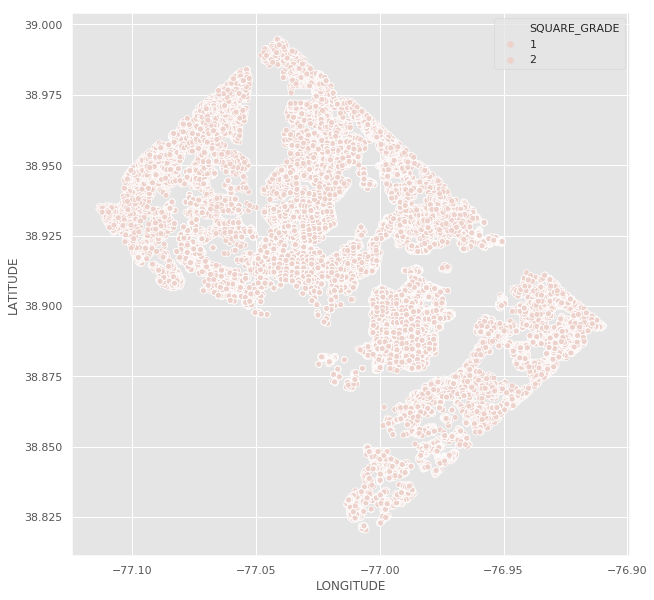

In [203]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_test,hue="SQUARE_GRADE")


In [21]:
df_train["SALEDATE"] = pd.to_datetime(df_train['SALEDATE'])

In [22]:
df_train.set_index('SALEDATE', inplace=True)

In [23]:
df_train.index.year

Float64Index([2016.0, 2010.0, 2011.0, 2010.0, 2001.0, 2012.0, 2005.0, 1997.0,
              2015.0, 2017.0,
              ...
              2012.0, 2007.0, 2017.0, 2015.0, 2016.0, 2012.0, 2015.0, 2009.0,
              2015.0, 2013.0],
             dtype='float64', name='SALEDATE', length=49108)

In [8]:
df_train.index.names

FrozenList(['SALEDATE'])

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.]),
 <a list of 9 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


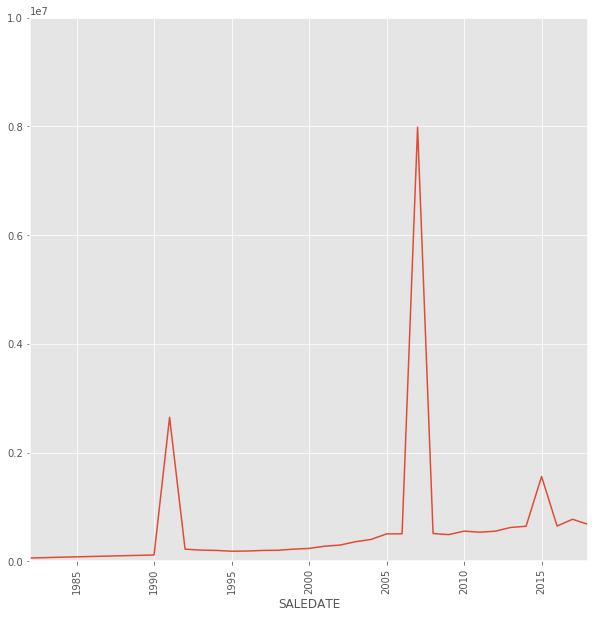

In [9]:
df_train.groupby(df_train.index.year).PRICE.mean().plot()

plt.ylim(0,10000000)
plt.xticks(rotation=90)

In [26]:
df_train = df_train[df_train["PRICE"] < 1000000]

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.]),
 <a list of 9 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


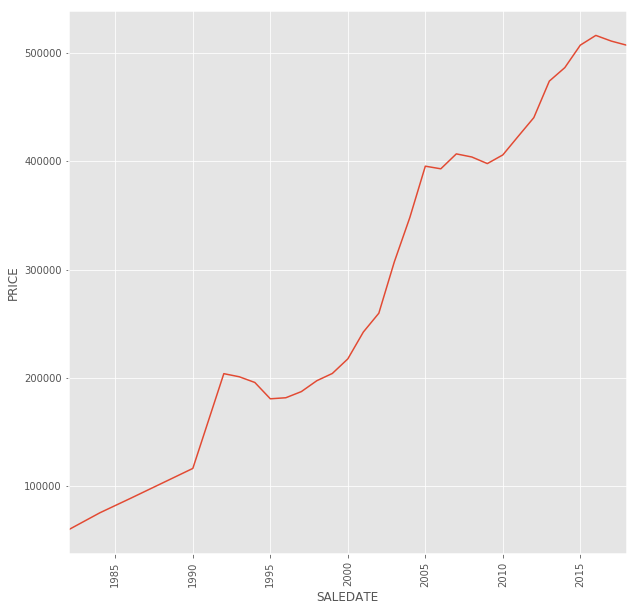

In [52]:
df_train.groupby(df_train.index.year).PRICE.mean().plot()
plt.ylabel("PRICE")

plt.xticks(rotation=90)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


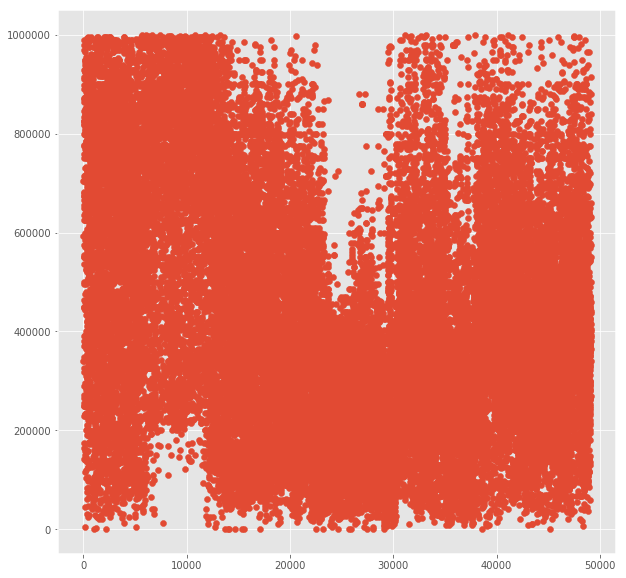

In [31]:
plt.scatter(df_train.Id,df_train.PRICE)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


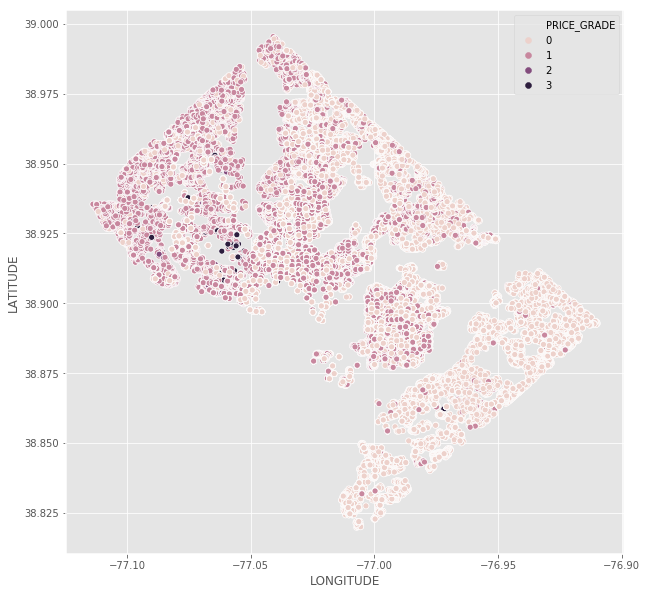

In [18]:
def func_cate(x):
    if  x < 500000:
        return 0
    elif x >= 500000 and x < 4000000:
        return 1
    elif x >= 4000000 and x < 5397300:
        return 2
    else:
        return 3


df_train['PRICE_GRADE'] = df_train['PRICE'].apply(func_cate)
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="PRICE_GRADE")

In [24]:
df_train.groupby(df_train.index.year).PRICE.mean()

SALEDATE
1982.0    6.000000e+04
1984.0    7.550000e+04
1986.0    8.900000e+04
1990.0    1.165000e+05
1991.0    2.650000e+06
1992.0    2.232811e+05
1993.0    2.062512e+05
1994.0    2.001929e+05
1995.0    1.853943e+05
1996.0    1.888069e+05
1997.0    1.998392e+05
1998.0    2.029944e+05
1999.0    2.238888e+05
2000.0    2.369840e+05
2001.0    2.777447e+05
2002.0    2.986191e+05
2003.0    3.604360e+05
2004.0    4.022430e+05
2005.0    5.043015e+05
2006.0    5.062464e+05
2007.0    7.986079e+06
2008.0    5.111346e+05
2009.0    4.907057e+05
2010.0    5.547214e+05
2011.0    5.358053e+05
2012.0    5.533026e+05
2013.0    6.224149e+05
2014.0    6.446697e+05
2015.0    1.560631e+06
2016.0    6.485933e+05
2017.0    7.733413e+05
2018.0    6.794491e+05
Name: PRICE, dtype: float64

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


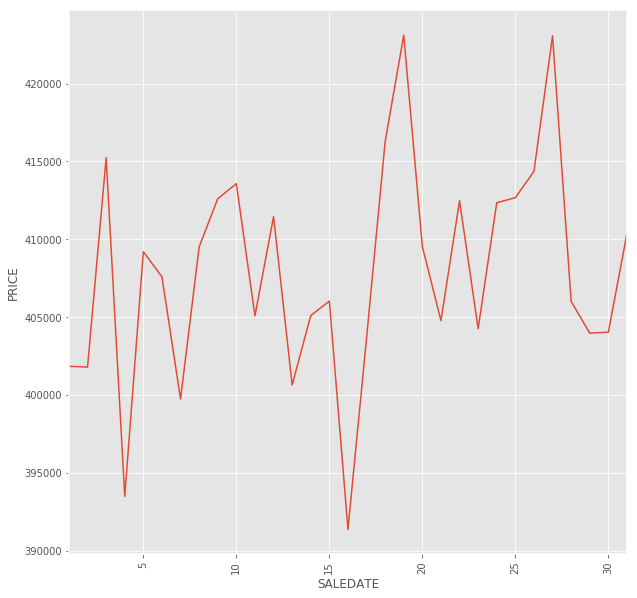

In [30]:
df_train.groupby(df_train.index.day).PRICE.mean().plot()
plt.ylabel("PRICE")

plt.xticks(rotation=90)